# Binomial Distribution

## Overview

In this section, we will review the <a href="https://en.wikipedia.org/wiki/Binomial_distribution">Binomial distribution</a>. This distribution has many applications in
real life.  Consider for example the statistical estimation of defective computers in a shipment.
We randomly select a computer and check whether this is defective or not. This process will form a sequence
of independent Bernoulli trials. 

Morever, in this section, we will look into the <a href="https://scipy.org/">SciPy</a> library standing for
Scientific Python. You can easily install the librayr using ```pip```

```
pip install scipy
```

## Binomial distribution

Let's start with the definition of the Binomial distribution. 

----

**Definition: Binomial distribution**

Consider a sequence of **independent** Bernoulli trials. The variable that describes the number of successes
in this sequence follows the Binomial distribution. The Binomial distribution is characterized by
two parameters; $n$, the number of trials, and $p$, the probability of success.

----

The probability mass function, PMF, of the Binomial distribution is given by 

$$P_X(x) = \binom{n}{x}p^xq^{n - x}, x=0,1,\cdots,n$$

which is the probability of exactly $x$ successes in $n$ trials. In this formula, $p^x$ is the probability of $x$ successes, probabilities being multiplied due to independence of trials. Here us an example.

----

**Example 1**

Let's assume we toss a coin 10 times. Every time we record the outcome of the toss. What is the probability we get four heads in the 10 times we toss the coin?

The Binomial distribution, gives us the probability of getting exactly $x$ successes in  $n$  trials. We assume that the coin is fair with $p=0.5$. Thus the probability is given by 

$$P_X(4) = \binom{10}{4}p^4q^{6}, p=0.5, q=0.5$$

We can use Python to calculate this probability. 



In [1]:
from scipy.stats import binom
from scipy import stats
import matplotlib.pyplot as plt

In [8]:
n, p = 10, 0.5
k=4

print(f"Probability of getting {k} heads in {n} coin tosses is {binom.pmf(k=k, n=n, p=p)}")

Probability of getting 4 heads in 10 coin tosses is 0.2050781249999999


----

----
**Example 2**

This time we roll a die 10 times. This is not a Bernoully experiment as there five possible outcomes.
However, if we restrict ourselves to the scenario of getting say a six or not, then this should be Bernoully experiment.
Thus, what is the probability we get a 6 four times. Assuming the the die is fair then $p=1/6$. 
Hence:

In [4]:
n, p = 10, 1.0/6.0
k=4

print(f"Probability of getting {k} 6s in {n} die rolls is {binom.pmf(k=k, n=n, p=p)}")

Probability of getting 4 6s in 10 die rolls is 0.054265875850988195


----

The ```binom.pmf``` function returns the probability of observing exactly 4 heads, or tails for that matter, are observed.
Notice, that the ```stats.binom.pmf``` can also be used to compute multiple probabilities simultaneously. 
In this case the function should return an array that its number of elements is equal to the number of elements of the
input array [4]:


In [27]:
n, p = 10, 1.0/6.0

# four and five 6s in the sequence
k=[4, 5]

print(f"Probability of getting {k} 6s in {n} die rolls is {binom.pmf(k=k, n=n, p=p)}")

Probability of getting [4, 5] 6s in 10 die rolls is [0.05426588 0.01302381]


Let's now consider a sequence of 10 die rolls.  

In [19]:
n, p = 20, 1.0/6.0
interval_all_counts = range(n + 1)
probabilities = stats.binom.pmf(interval_all_counts, n, p)
total_prob = probabilities.sum()
print(f"Total sum of probabilities equals {total_prob:.14f}")


Total sum of probabilities equals 1.00000000000000


Let's try to plot the Binomial distribution for number of experiments

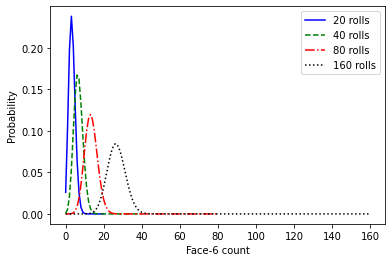

In [23]:
p = 1.0/6.0
roll_counts = [20, 40, 80, 160]
linestyles = ['-', '--', '-.', ':']
colors = ['b', 'g', 'r', 'k']
 
for num_rolls, linestyle, color in zip(roll_counts, linestyles, colors):
    x_values = range(num_rolls + 1)
    y_values = stats.binom.pmf(x_values, num_rolls, p)
    plt.plot(x_values, y_values, linestyle=linestyle, color=color,
             label=f'{num_rolls} rolls')
plt.legend()
plt.xlabel('Face-6 count')
plt.ylabel('Probability')
plt.show()

As the number of dies rolls increases the distribution center shifts to the right.
In addition, the dispersion of the values seems to increase [4]. As we will see below, the variance of the Binomial distribution
is given by 

$$Var\left[X\right] = npq$$

Let's use the formula to compute the variance for the given number or folls:

In [26]:
for num_rolls in roll_counts:
    print(f"Variance for roll count {num_rolls} is {num_rolls * p * (1.0 -p)}")
   

Variance for roll count 20 is 2.7777777777777777
Variance for roll count 40 is 5.555555555555555
Variance for roll count 80 is 11.11111111111111
Variance for roll count 160 is 22.22222222222222


### Mean and variance

Graphically, visualising the distribution is useful, but we also want to be able to numerically describe the data.
The mean and the variance of a distribution are frequently used to describe it. So in this section, we will see how to
compute the mean and the variance of a Binomial distribution. Recall that the for a discrete variable $X$ the mean and variance
can be computed according to

$$\mu = E(X) = \sum_x xP_X(x)$$

$$\sigma^2 = Var(X) = E(X - E[X])^2 = \sum_x (x-\mu)^2P_X(x)$$


where $P_X$ is the PMF of the distribution describing the variable. For the Binomial distribution the PMF is

$$P_X(x) = \binom{n}{x}p^xq^{n - x}, x=0,1,\cdots,n$$

The PMF above can be simplify by observing that each Bernoulli trial is associated with a Bernoulli variable that equals either 1 or 0 [3].  If we sum all these variables, we get the overall number of successes. Thus, we can represent any Binomial variable $X$ as a sum of independent Bernoulli variables:

$$X = X_1 + X_2 + \dots  +X_n$$

It is now easy to compute the mean and the variance of the Binomial distribution; 

$$E\left[X\right] = np$$

$$Var\left[X\right] = npq$$

Both quantities are fairly easy to compute. With SciPy we can do

In [3]:
n=10
p = 1./6.

mean = stats.binom.mean(n, p)
print(f"Mean of Binomial distribution for n={n} experiments with sucesse p={p} is {mean}")
var = stats.binom.var(n, p)
print(f"Variance of Binomial distribution for n={n} experiments with sucesse p={p} is {var}")

Mean of Binomial distribution for n=10 experiments with sucesse p=0.16666666666666666 is 1.6666666666666665
Variance of Binomial distribution for n=10 experiments with sucesse p=0.16666666666666666 is 1.3888888888888888


In the next section, we will introduce the Poisson distribution and 
how to use it in order to approximate the Binomial distribution.

## Summary

In this section we discussed the Binomial distribution. This distribution describes the number of successes
in a series of independent Bernoulli trials. The Binomial distribution is characterized by two parameters; 
$n$, the number of trials, and $p$, the probability of success. The mean and the variance are

$$E\left[X\right] = np$$
$$Var\left[X\right] = npq$$



## References

1. <a href="https://en.wikipedia.org/wiki/Binomial_distribution">Binomial distribution</a>
2. <a href="https://scipy.org/">SciPy</a>
3. Michael Baron, _Probability and statistics for computer scientists_, 2nd Edition, CRC Press.
4. Leonard Apeltsin, _Data Science Bookcamp_, Manning Publications, 2021.